In [41]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import dabl
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import pickle

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.linear_model import LogisticRegression


from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

## EDA-  AutoEDA Libraries - dabl

In [2]:
!pip install dabl

     |████████████████████████████████| 563 kB 2.3 MB/s eta 0:00:01


In [2]:
df = pd.read_csv('RTA Dataset.csv')

In [3]:
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0            Owner              Above 10yr         No defect   
1            Owner                 5-10yrs         No defect   
2            Owner                     NaN         No defect   
3     Governmental                     NaN         No defect   
4            Owner                 5-10yrs         No defect   

  Area_accident_occured   Lanes_or_Medians  \
0     Residential areas                NaN   
1          Office areas  Undivided Two way   
2    Recreational areas              other   
3          Office areas              other   
4      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestri

In [5]:
df.shape

(12316, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [13]:
data_clean = dabl.clean(df)[::10]
data_clean

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
10     14:40:00    Saturday              18-30          Male   
20      8:20:00     Tuesday           Under 18          Male   
30     15:30:00      Monday              18-30          Male   
40     16:30:00      Sunday              31-50          Male   
...         ...         ...                ...           ...   
12270  18:35:00    Saturday              31-50          Male   
12280  19:02:00    Saturday              18-30          Male   
12290  16:26:00     Tuesday            Over 51          Male   
12300  19:12:00     Tuesday              31-50          Male   
12310   9:05:00      Friday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
10      Above high school                   Owner              1-2yr   
20     Junior high school                Employee              2-5yr   
30     Junior high school                Employee              2-5yr   
40            High school                Employee          Below 1yr   
...                   ...                     ...                ...   
12270                 NaN                     NaN                NaN   
12280  Junior high school                Employee             5-10yr   
12290   Above high school                   Owner              2-5yr   
12300   Elementary school                   Owner         Above 10yr   
12310                 NaN                Employee                NaN   

            Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
0                Automobile            Owner              Above 10yr  ...   
10     Public (13?45 seats)            Owner                 Unknown  ...   
20          Lorry (41?100Q)            Owner                     NaN  ...   
30               Automobile            Owner                     NaN  ...   
40         Pick up upto 10Q            Owner              Above 10yr  ...   
...                     ...              ...                     ...  ...   
12270            Automobile            Owner                  2-5yrs  ...   
12280  Public (13?45 seats)            Owner                     NaN  ...   
12290     Public (12 seats)            Owner                     NaN  ...   
12300       Lorry (41?100Q)            Owner                  2-5yrs  ...   
12310       Special vehicle            Owner              Above 10yr  ...   

      Work_of_casuality Pedestrian_movement  \
0                   NaN    Not a Pedestrian   
10                  NaN    Not a Pedestrian   
20               Driver    Not a Pedestrian   
30                  NaN    Not a Pedestrian   
40                  NaN    Not a Pedestrian   
...                 ...                 ...   
12270            Driver    Not a Pedestrian   
12280               NaN    Not a Pedestrian   
12290               NaN    Not a Pedestrian   
12300            Driver    Not a Pedestrian   
12310          Employee    Not a Pedestrian   

                        Cause_of_accident Accident_severity  \
0                         Moving Backward     Slight Injury   
10              Changing lane to the left    Serious Injury   
20     Getting off the vehicle improperly     Slight Injury   
30              Changing lane to the left     Slight Injury   
40                     Driving carelessly     Slight Injury   
...                                   ...               ...   
12270                       No distancing      Fatal injury   
12280                       No distancing     Slight Injury   
12290          Changing lane to the right     Slight Injury   
12300                          Overtaking    Serious Injury   
12310           Changing lane to the left    Serious Injury   

      Age_band_of_casualty_18-30 Age_band_of_casualty_31-50  \
0                            0.0                        0.0   
10  

Target looks like classification
Showing only top 10 of 32 categorical features


[None, None]

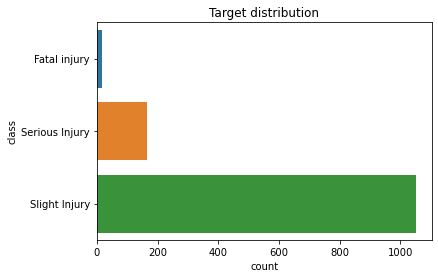

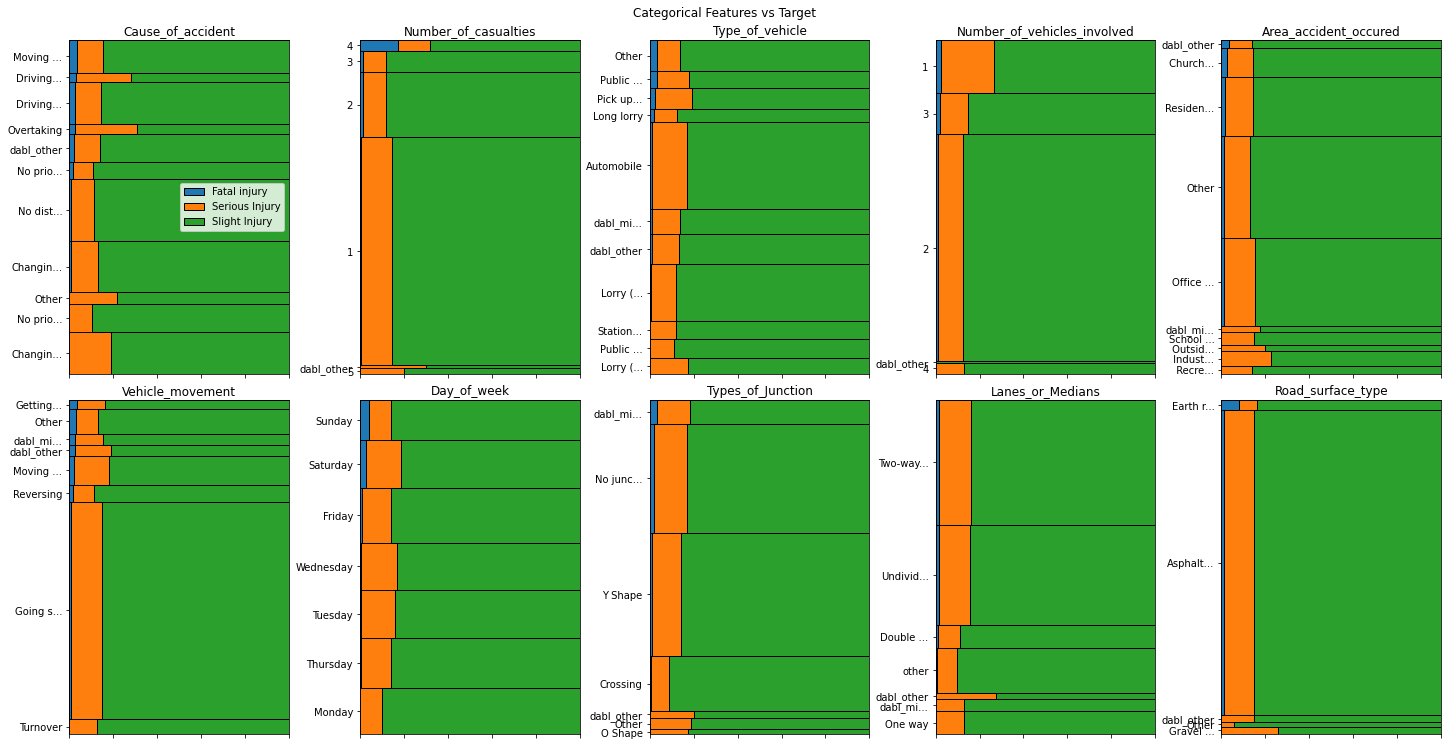

In [20]:
dabl.plot(data_clean, target_col="Accident_severity")

In [21]:
ec = dabl.SimpleClassifier(random_state=0).fit(data_clean, target_col="Accident_severity") 

Running DummyClassifier(random_state=0)
accuracy: 0.852 recall_macro: 0.333 precision_macro: 0.284 f1_macro: 0.307
=== new best DummyClassifier(random_state=0) (using recall_macro):
accuracy: 0.852 recall_macro: 0.333 precision_macro: 0.284 f1_macro: 0.307

Running GaussianNB()
accuracy: 0.209 recall_macro: 0.325 precision_macro: 0.327 f1_macro: 0.149
Running MultinomialNB()
accuracy: 0.832 recall_macro: 0.331 precision_macro: 0.313 f1_macro: 0.313
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=0)
accuracy: 0.693 recall_macro: 0.468 precision_macro: 0.299 f1_macro: 0.343
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=0) (using recall_macro):
accuracy: 0.693 recall_macro: 0.468 precision_macro: 0.299 f1_macro: 0.343

Running DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)
accuracy: 0.621 recall_macro: 0.391 precision_macro: 0.346 f1_macro: 0.321
Running DecisionTreeClassifier(class_we

Depth: 1
Number of leaves: 2


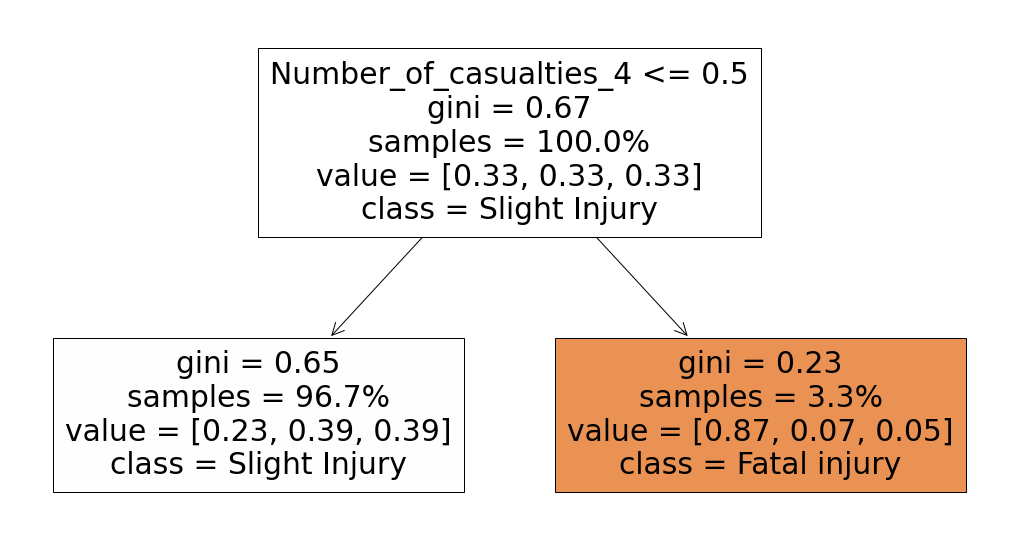

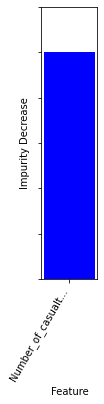

In [22]:
dabl.explain(ec)

## Initial Study - EDA

In [2]:
df = pd.read_csv('RTA Dataset.csv')

In [3]:
df.head(2)

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   

  Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0             na              na                   na                na   
1             na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   

  Cause_of_accident Accident_severity  
0   Moving Backward     Slight Injury  
1        Overtaking     Slight Injury  

[2 rows x 32 columns]

In [4]:
df.shape

(12316, 32)

In [5]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
df['Time'] = pd.to_datetime(df['Time'])

In [8]:
df['Time']

0       2023-03-03 17:02:00
1       2023-03-03 17:02:00
2       2023-03-03 17:02:00
3       2023-03-03 01:06:00
4       2023-03-03 01:06:00
                ...        
12311   2023-03-03 16:15:00
12312   2023-03-03 18:00:00
12313   2023-03-03 13:55:00
12314   2023-03-03 13:55:00
12315   2023-03-03 13:55:00
Name: Time, Length: 12316, dtype: datetime64[ns]

In [9]:
# extracting hour and minute from timestamp
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df.drop('Time', axis=1, inplace=True)

In [10]:
df.isna().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe().T

count       mean        std  min   25%   50%  \
Number_of_vehicles_involved  12316.0   2.040679   0.688790  1.0   2.0   2.0   
Number_of_casualties         12316.0   1.548149   1.007179  1.0   1.0   1.0   
Hour                         12316.0  13.835823   5.202923  0.0  10.0  15.0   
Minute                       12316.0  27.696736  17.482604  0.0  12.0  30.0   

                              75%   max  
Number_of_vehicles_involved   2.0   7.0  
Number_of_casualties          2.0   8.0  
Hour                         18.0  23.0  
Minute                       43.0  59.0

In [13]:
df.describe(include = 'O').T

count unique  \
Day_of_week              12316      7   
Age_band_of_driver       12316      5   
Sex_of_driver            12316      3   
Educational_level        11575      7   
Vehicle_driver_relation  11737      4   
Driving_experience       11487      7   
Type_of_vehicle          11366     17   
Owner_of_vehicle         11834      4   
Service_year_of_vehicle   8388      6   
Defect_of_vehicle         7889      3   
Area_accident_occured    12077     14   
Lanes_or_Medians         11931      7   
Road_allignment          12174      9   
Types_of_Junction        11429      8   
Road_surface_type        12144      5   
Road_surface_conditions  12316      4   
Light_conditions         12316      4   
Weather_conditions       12316      9   
Type_of_collision        12161     10   
Vehicle_movement         12008     13   
Casualty_class           12316      4   
Sex_of_casualty          12316      3   
Age_band_of_casualty     12316      6   
Casualty_severity        12316      4   
Work_of_casuality         9118      7   
Fitness_of_casuality      9681      5   
Pedestrian_movement      12316      9   
Cause_of_accident        12316     20   
Accident_severity        12316      3   

                                                                      top  \
Day_of_week                                                        Friday   
Age_band_of_driver                                                  18-30   
Sex_of_driver                                                        Male   
Educational_level                                      Junior high school   
Vehicle_driver_relation                                          Employee   
Driving_experience                                                 5-10yr   
Type_of_vehicle                                                Automobile   
Owner_of_vehicle                                                    Owner   
Service_year_of_vehicle                                           Unknown   
Defect_of_vehicle                                               No defect   
Area_accident_occured                                               Other   
Lanes_or_Medians         Two-way (divided with broken lines road marking)   
Road_allignment                            Tangent road with flat terrain   
Types_of_Junction                                                 Y Shape   
Road_surface_type                                           Asphalt roads   
Road_surface_conditions                                               Dry   
Light_conditions                                                 Daylight   
Weather_conditions                                                 Normal   
Type_of_collision                          Vehicle with vehicle collision   
Vehicle_movement                                           Going straight   
Casualty_class                                            Driver or rider   
Sex_of_casualty                                                      Male   
Age_band_of_casualty                                                   na   
Casualty_severity                                                       3   
Work_of_casuality                                                  Driver   
Fitness_of_casuality                                               Normal   
Pedestrian_movement                                      Not a Pedestrian   
Cause_of_accident                                           No distancing   
Accident_severity                                           Slight Injury   

                          freq  
Day_of_week               2041  
Age_band_of_driver        4271  
Sex_of_driver            11437  
Educational_level         7619  
Vehicle_driver_relation   9627  
Driving_experience        3363  
Type_of_vehicle           3205  
Owner_of_vehicle         10459  
Service_year_of_vehicle   2883  
Defect_of_vehicle         7777  
Area_accident_occured     3819  
Lanes_or_Medians          4411  
Road_allignment          10459  
Types_of_Junction    

Observations

1. Number of observations: 12316
2. Number of columns: 32
3. Number of numerical columns: 2
4. Number of Categorical columns: 30
5. Number of columns with missing values: 16
6. Colums with missing values: Educational_level, 
    Vehicle_driver_relation, 
    Driving_experience, 
    Type_of_vehicle, 
    Owner_of_vehicle, 
    Service_year_of_vehicle, 
    Defect_of_vehicle, 
    Area_accident_occured, 
    Lanes_or_Medians, 
    Road_allignment, 
    Types_of_Junction, 
    Road_surface_type,
    Type_of_collision,
    Vehicle_movement,
    Work_of_casuality,
    Fitness_of_casuality 
7. No Duplicates

In [7]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [14]:
## Rename the cols for convenence
col_map={
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'road_surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity',
    'Hour': 'hour', 
    'Minute' : 'minute'
}
df.rename(columns=col_map, inplace=True)

In [15]:
df.head()

day_of_week driver_age driver_sex   educational_level  \
0      Monday      18-30       Male   Above high school   
1      Monday      31-50       Male  Junior high school   
2      Monday      18-30       Male  Junior high school   
3      Sunday      18-30       Male  Junior high school   
4      Sunday      18-30       Male  Junior high school   

  vehicle_driver_relation driving_experience         vehicle_type  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  vehicle_owner service_year vehicle_defect  ... casualty_sex casualty_age  \
0         Owner   Above 10yr      No defect  ...           na           na   
1         Owner      5-10yrs      No defect  ...           na           na   
2         Owner          NaN      No defect  ...         Male        31-50   
3  Governmental          NaN      No defect  ...       Female        18-30   
4         Owner      5-10yrs      No defect  ...           na           na   

  casualty_severity casualty_work casualty_fitness pedestrian_movement  \
0                na           NaN              NaN    Not a Pedestrian   
1                na           NaN              NaN    Not a Pedestrian   
2                 3        Driver              NaN    Not a Pedestrian   
3                 3        Driver           Normal    Not a Pedestrian   
4                na           NaN              NaN    Not a Pedestrian   

               accident_cause accident_severity hour  minute  
0             Moving Backward     Slight Injury   17       2  
1                  Overtaking     Slight Injury   17       2  
2   Changing lane to the left    Serious Injury   17       2  
3  Changing lane to the right     Slight Injury    1       6  
4                  Overtaking     Slight Injury    1       6  

[5 rows x 33 columns]

## Visulizations

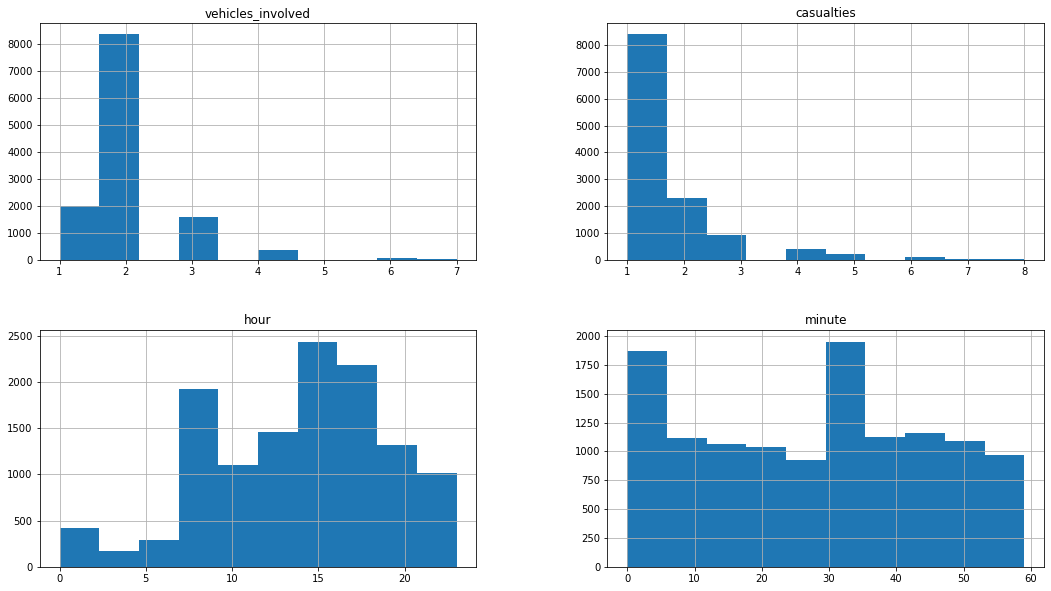

In [81]:
# Plots the numerical fetures in the given dataframe
df.hist(figsize=(18,10)) 
plt.show()
#Observations 
# more records for 2 vehicles 
# more records of 1 casuality
# more records between 15:00 and 20:00
# more records at 0th min and 30th min

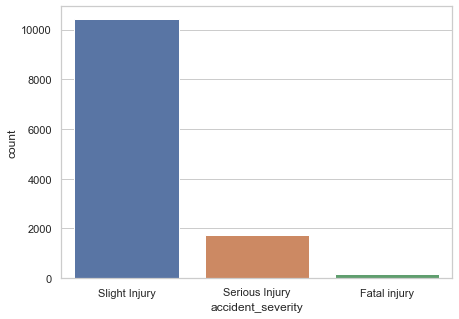

In [167]:
#Plot target feature
ax = plt.subplots(figsize=(7,5))
sns.set_theme(style='whitegrid')
cp = sns.countplot(x=df['accident_severity'])

#observation
#slightly injured values are more
#output imbalance

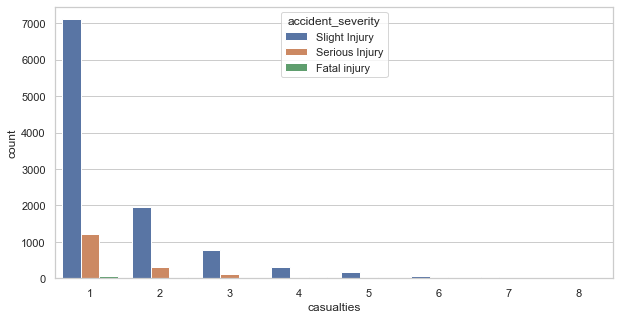

In [135]:
##Bivarient analysis on casualties vs accident_severity
ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='whitegrid')
cp = sns.countplot(x = df['casualties'], hue=df['accident_severity'])

In [ ]:
## Crosstab categorical features with target

In [175]:
df.columns

Index(['day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'road_surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity', 'hour', 'minute'],
      dtype='object')

In [140]:
pd.crosstab(index=df['driver_sex'], columns=df['accident_severity'])

accident_severity  Fatal injury  Serious Injury  Slight Injury
driver_sex                                                    
Female                        5             104            592
Male                        152            1621           9664
Unknown                       1              18            159

In [170]:
pd.crosstab(index=df['driver_age'], columns=df['accident_severity'])

accident_severity  Fatal injury  Serious Injury  Slight Injury
driver_age                                                    
18-30                        62             604           3605
31-50                        54             541           3492
Over 51                      24             257           1304
Under 18                     12             169            644
Unknown                       6             172           1370

In [141]:
pd.crosstab(index=df['day_of_week'], columns=df['accident_severity'])

accident_severity  Fatal injury  Serious Injury  Slight Injury
day_of_week                                                   
Friday                       16             313           1712
Monday                       12             204           1465
Saturday                     37             245           1384
Sunday                       35             190           1242
Thursday                     22             272           1557
Tuesday                      17             257           1496
Wednesday                    19             262           1559

In [172]:
pd.crosstab(index=df['minute'], columns=df['accident_severity'])

accident_severity  Fatal injury  Serious Injury  Slight Injury
minute                                                        
0                            20             201           1275
5                             8             154            620
10                           19             137            873
15                           19             132            782
20                           15             135            852
25                           10             148            658
30                           15             189           1303
35                           15             131            665
40                           15             131            884
45                            6             132            874
50                            5             142            933
55                           11             111            696

In [176]:
pd.crosstab(index=df['casualty_severity'], columns=df['accident_severity'])

accident_severity  Fatal injury  Serious Injury  Slight Injury
casualty_severity                                             
1                             0               3             23
2                            10              98            663
3                           100            1028           5948
na                           48             614           3781

In [16]:
df.describe(include = 'object').T

count unique  \
day_of_week              12316      7   
driver_age               12316      5   
driver_sex               12316      3   
educational_level        11575      7   
vehicle_driver_relation  11737      4   
driving_experience       11487      7   
vehicle_type             11366     17   
vehicle_owner            11834      4   
service_year              8388      6   
vehicle_defect            7889      3   
accident_area            12077     14   
lanes                    11931      7   
road_allignment          12174      9   
junction_type            11429      8   
road_surface_type        12144      5   
road_surface_conditions  12316      4   
light_condition          12316      4   
weather_condition        12316      9   
collision_type           12161     10   
vehicle_movement         12008     13   
casualty_class           12316      4   
casualty_sex             12316      3   
casualty_age             12316      6   
casualty_severity        12316      4   
casualty_work             9118      7   
casualty_fitness          9681      5   
pedestrian_movement      12316      9   
accident_cause           12316     20   
accident_severity        12316      3   

                                                                      top  \
day_of_week                                                        Friday   
driver_age                                                          18-30   
driver_sex                                                           Male   
educational_level                                      Junior high school   
vehicle_driver_relation                                          Employee   
driving_experience                                                 5-10yr   
vehicle_type                                                   Automobile   
vehicle_owner                                                       Owner   
service_year                                                      Unknown   
vehicle_defect                                                  No defect   
accident_area                                                       Other   
lanes                    Two-way (divided with broken lines road marking)   
road_allignment                            Tangent road with flat terrain   
junction_type                                                     Y Shape   
road_surface_type                                           Asphalt roads   
road_surface_conditions                                               Dry   
light_condition                                                  Daylight   
weather_condition                                                  Normal   
collision_type                             Vehicle with vehicle collision   
vehicle_movement                                           Going straight   
casualty_class                                            Driver or rider   
casualty_sex                                                         Male   
casualty_age                                                           na   
casualty_severity                                                       3   
casualty_work                                                      Driver   
casualty_fitness                                                   Normal   
pedestrian_movement                                      Not a Pedestrian   
accident_cause                                              No distancing   
accident_severity                                           Slight Injury   

                          freq  
day_of_week               2041  
driver_age                4271  
driver_sex               11437  
educational_level         7619  
vehicle_driver_relation   9627  
driving_experience        3363  
vehicle_type              3205  
vehicle_owner            10459  
service_year              2883  
vehicle_defect            7777  
accident_area             3819  
lanes                     4411  
road_allignment          10459  
junction_type        

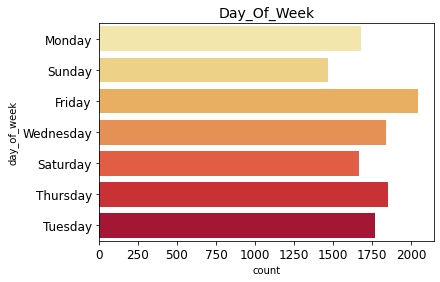

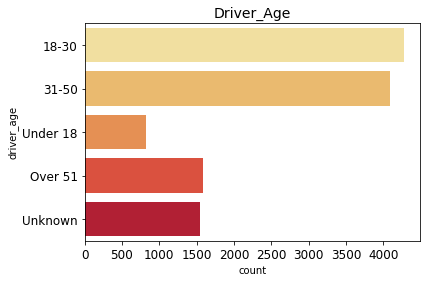

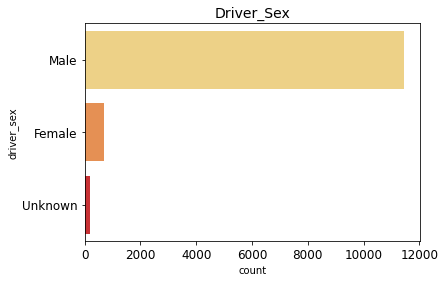

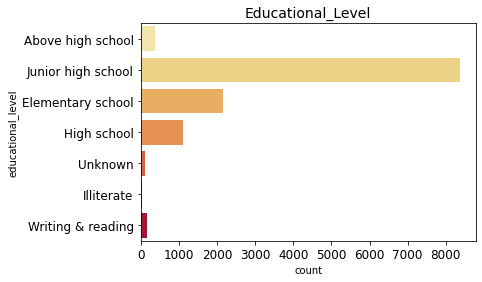

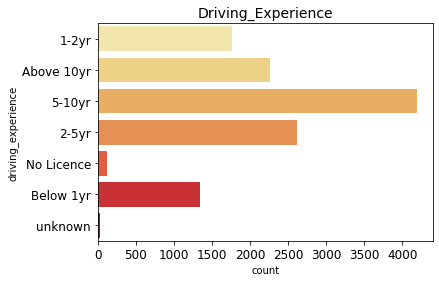

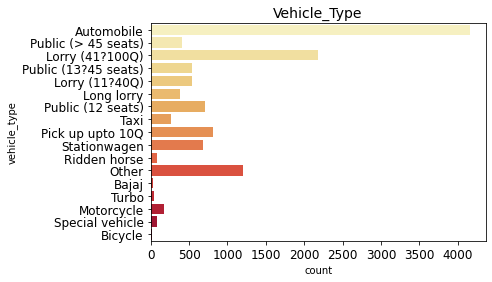

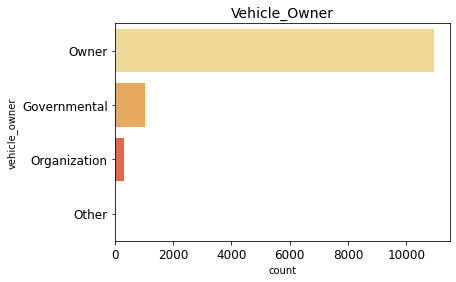

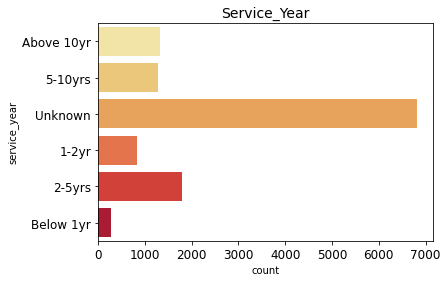

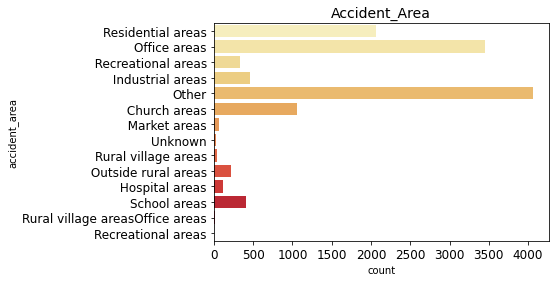

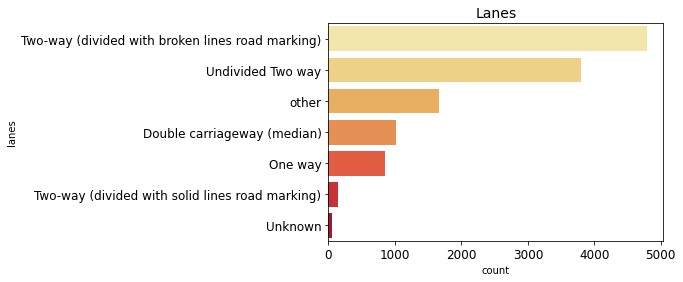

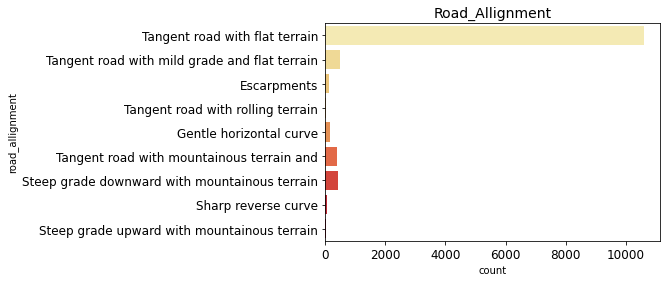

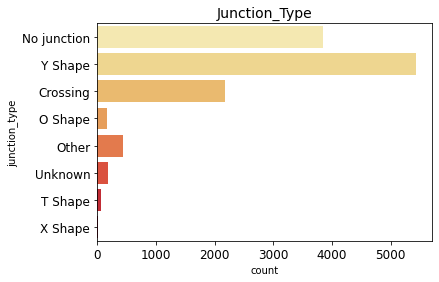

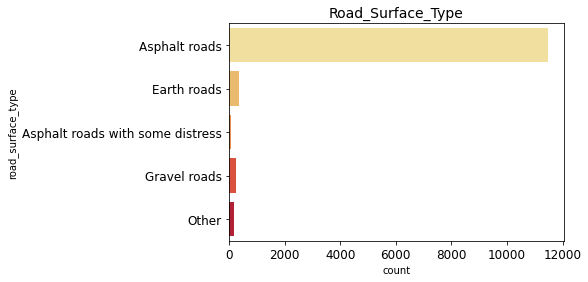

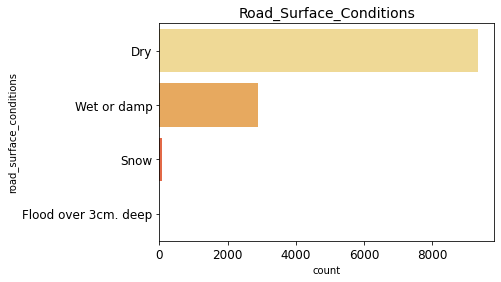

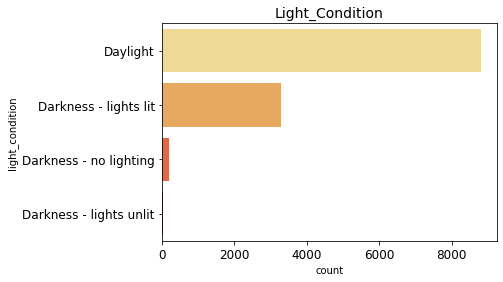

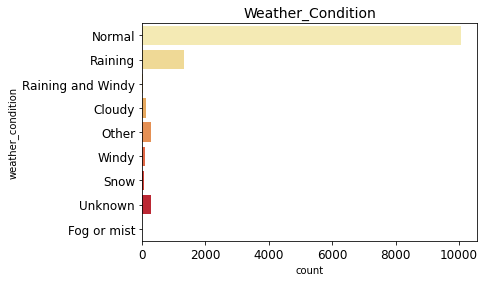

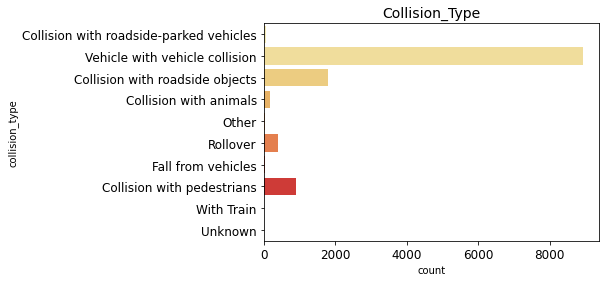

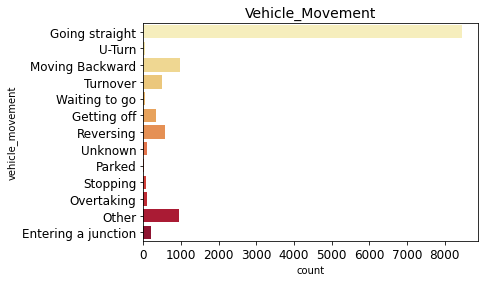

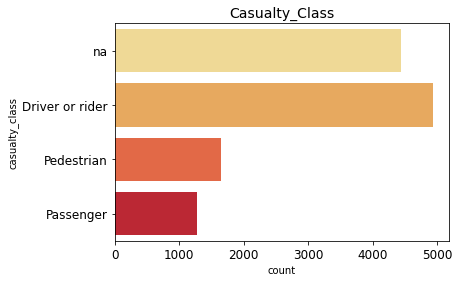

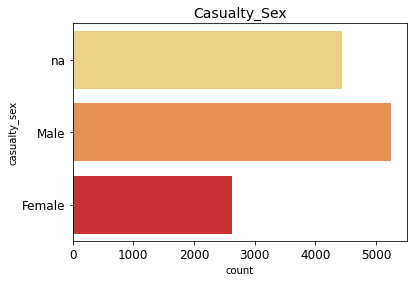

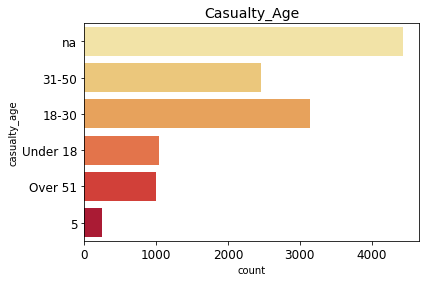

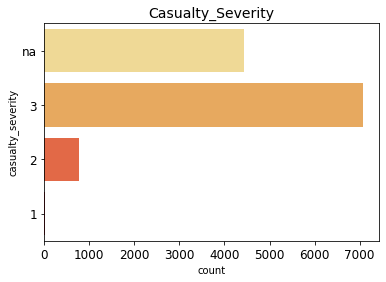

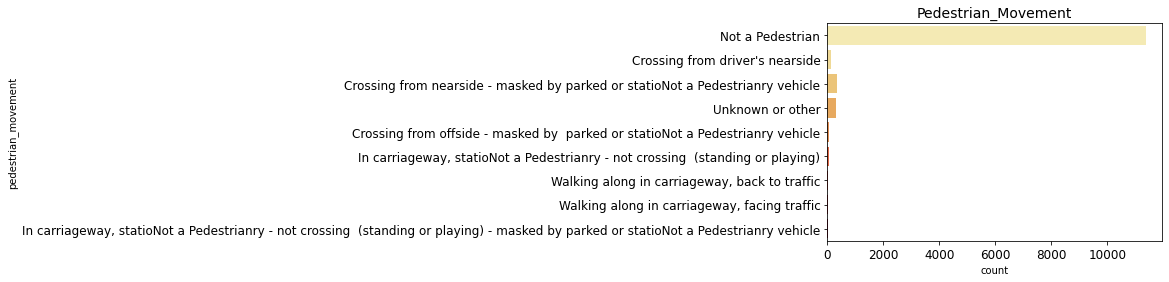

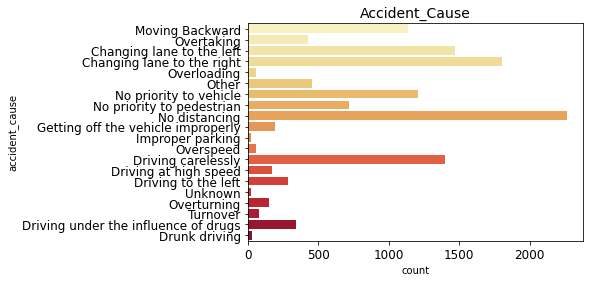

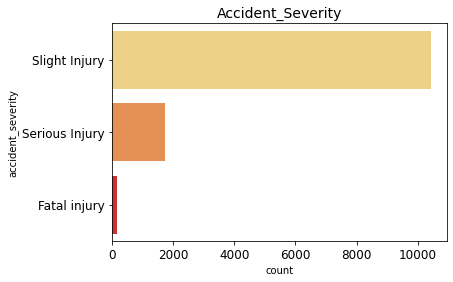

In [40]:
## Ploting categorical data
for col in df.select_dtypes(include='object'):
    sns.countplot(y=col, data=df, palette='YlOrRd')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(col.title(), fontsize=14)
    plt.show()

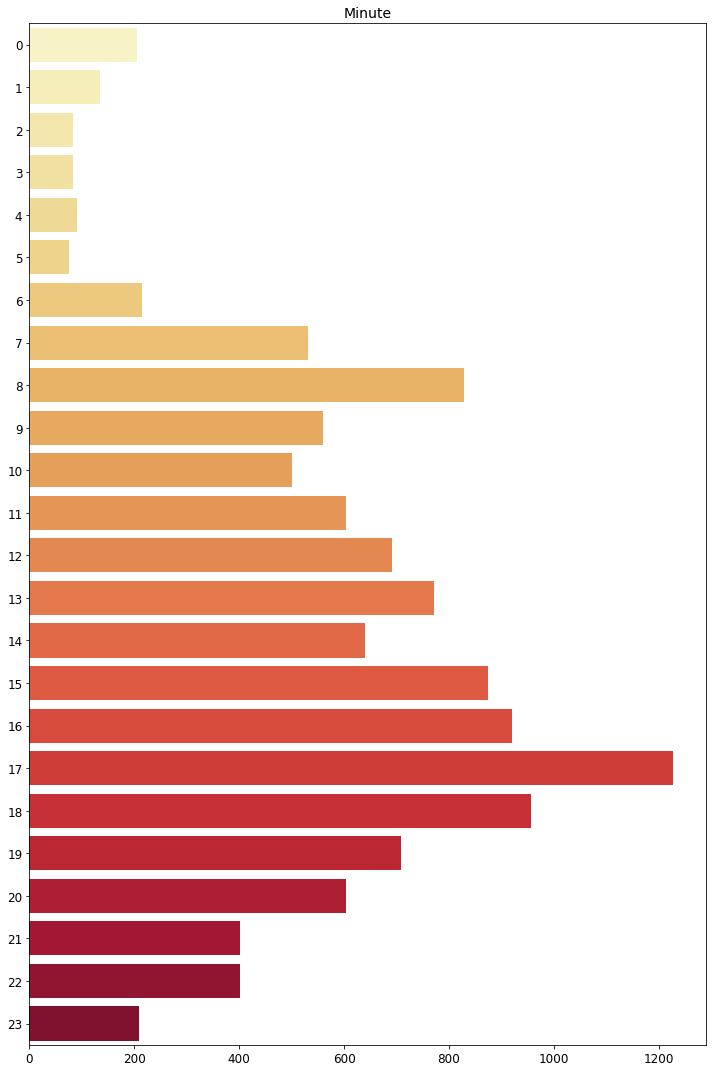

In [38]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='hour', palette='YlOrRd')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [380]:
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

In [381]:
df['minute'] = df['minute'].apply(lambda x: convert_minutes(x))

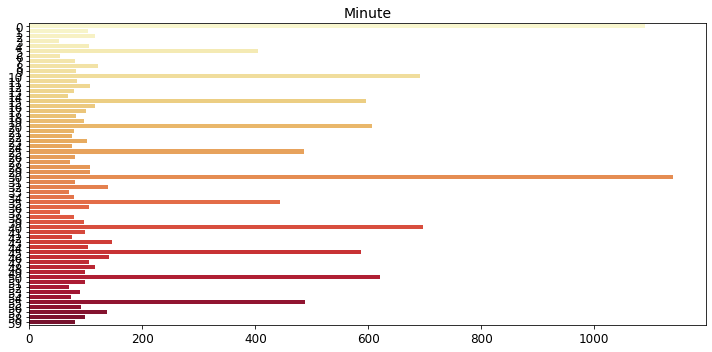

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='minute', palette='YlOrRd')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### Observations:

Most of the accidents:
* involved 2 vehicles and 2 casualties
* occured on Fridays and after noon hours

Most of the drivers:
* are male and in 18-30 yrs age group
* have only went upto Junior high school and are employees
* have 5-10 yrs of driving experience

Most of the accidents happened with personally owned passenger vehicles.

Most of the drivers have met with accident on:
* two-way lanes
* tangent road with flat terrains
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

Most of the casualties:
* happened to physically fit male drivers
* are of severity 3

The conditions on which most of the drivers met with the accident are:
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.

## Preprocessing - Handling missing values

In [22]:
#get all values which have null data in it
df.isna().sum()[df.isna().sum() != 0]

educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
road_surface_type           172
collision_type              155
vehicle_movement            308
casualty_work              3198
casualty_fitness           2635
dtype: int64

In [23]:
df['casualty_fitness'].value_counts()
#ignore column

Normal          9608
NormalNormal      19
Deaf              18
Other             18
Blind             18
Name: casualty_fitness, dtype: int64

In [24]:
df['casualty_work'].value_counts()
#ignore column

Driver           5903
Self-employed    2044
Employee          553
Other             463
Student           103
Unemployed         33
Unknown            19
Name: casualty_work, dtype: int64

In [25]:
df['vehicle_driver_relation'].value_counts()
#ignore column

Employee    9627
Owner       1973
Other        123
Unknown       14
Name: vehicle_driver_relation, dtype: int64

In [26]:
df['vehicle_defect'].value_counts()
#ignore column

No defect    7777
7              76
5              36
Name: vehicle_defect, dtype: int64

In [27]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['vehicle_defect', 
                   'vehicle_driver_relation', 
                   'casualty_work', 
                   'casualty_fitness',], inplace=True)

In [28]:
df.isna().sum() [df.isna().sum() != 0]

educational_level      741
driving_experience     829
vehicle_type           950
vehicle_owner          482
service_year          3928
accident_area          239
lanes                  385
road_allignment        142
junction_type          887
road_surface_type      172
collision_type         155
vehicle_movement       308
dtype: int64

In [29]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

In [30]:
df.isna().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
road_surface_type          0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

In [31]:
df

day_of_week driver_age driver_sex   educational_level  \
0          Monday      18-30       Male   Above high school   
1          Monday      31-50       Male  Junior high school   
2          Monday      18-30       Male  Junior high school   
3          Sunday      18-30       Male  Junior high school   
4          Sunday      18-30       Male  Junior high school   
...           ...        ...        ...                 ...   
12311   Wednesday      31-50       Male  Junior high school   
12312      Sunday    Unknown       Male   Elementary school   
12313      Sunday    Over 51       Male  Junior high school   
12314      Sunday      18-30     Female  Junior high school   
12315      Sunday      18-30       Male  Junior high school   

      driving_experience         vehicle_type vehicle_owner service_year  \
0                  1-2yr           Automobile         Owner   Above 10yr   
1             Above 10yr  Public (> 45 seats)         Owner      5-10yrs   
2                  1-2yr      Lorry (41?100Q)         Owner      Unknown   
3                 5-10yr  Public (> 45 seats)  Governmental      Unknown   
4                  2-5yr           Automobile         Owner      5-10yrs   
...                  ...                  ...           ...          ...   
12311              2-5yr       Lorry (11?40Q)         Owner      Unknown   
12312             5-10yr           Automobile         Owner      Unknown   
12313             5-10yr                Bajaj         Owner       2-5yrs   
12314         Above 10yr      Lorry (41?100Q)         Owner       2-5yrs   
12315             5-10yr                Other         Owner       2-5yrs   

              accident_area                                             lanes  \
0         Residential areas  Two-way (divided with broken lines road marking)   
1              Office areas                                 Undivided Two way   
2        Recreational areas                                             other   
3              Office areas                                             other   
4          Industrial areas                                             other   
...                     ...                                               ...   
12311   Outside rural areas                                 Undivided Two way   
12312   Outside rural areas  Two-way (divided with broken lines road marking)   
12313   Outside rural areas  Two-way (divided with broken lines road marking)   
12314          Office areas                                 Undivided Two way   
12315   Outside rural areas                                 Undivided Two way   

       ... vehicle_movement   casualty_class casualty_sex casualty_age  \
0      ...   Going straight               na           na           na   
1      ...   Going straight               na           na           na   
2      ...   Going straight  Driver or rider         Male        31-50   
3      ...   Going straight       Pedestrian       Female        18-30   
4      ...   Going straight               na           na           na   
...    ...              ...              ...          ...          ...   
12311  ...   Going straight               na           na           na   
12312  ...            Other               na           na           na   
12313  ...            Other  Driver or rider         Male        31-50   
12314  ...            Other               na           na           na   
12315  ...         Stopping       Pedestrian       Female            5   

      casualty_severity                                pedestrian_movement  \
0                    na                                   Not a Pedestrian   
1                    na                                   Not a Pedestrian   
2                     3                                   Not a Pedestrian   
3                     3                                   Not a Pedestrian   
4                    na                                   Not a Pedestrian   
...   

In [32]:
df.shape

(12316, 29)

In [15]:
path = '##Set the path'
df.to_csv(path + '/RoadTrafficSeverityClassification/data.csv', index=False)

##### NOTE

1. dropped - vehicle_defect, vehicle_driver_relation, casualty_work, casualty_fitness
2. mode imutation done

## Pandas Profiling

In [42]:
!pip install ipywidgets

In [44]:
summary=ProfileReport(df, title="Accident Severity Report",explorative=True)

In [45]:
summary.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
summary.to_file('RTA_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Encoding - Using Lable encoding

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day_of_week              12316 non-null  object
 1   driver_age               12316 non-null  object
 2   driver_sex               12316 non-null  object
 3   educational_level        12316 non-null  object
 4   driving_experience       12316 non-null  object
 5   vehicle_type             12316 non-null  object
 6   vehicle_owner            12316 non-null  object
 7   service_year             12316 non-null  object
 8   accident_area            12316 non-null  object
 9   lanes                    12316 non-null  object
 10  road_allignment          12316 non-null  object
 11  junction_type            12316 non-null  object
 12  road_surface_type        12316 non-null  object
 13  road_surface_conditions  12316 non-null  object
 14  light_condition          12316 non-nul

In [3]:
path = '##Set the path'
df = pd.read_csv(path + '/RoadTrafficSeverityClassification/data.csv')

In [4]:
df.head(1)

day_of_week driver_age driver_sex  educational_level driving_experience  \
0      Monday      18-30       Male  Above high school              1-2yr   

  vehicle_type vehicle_owner service_year      accident_area  \
0   Automobile         Owner   Above 10yr  Residential areas   

                                              lanes  ... vehicle_movement  \
0  Two-way (divided with broken lines road marking)  ...   Going straight   

  casualty_class casualty_sex casualty_age casualty_severity  \
0             na           na           na                na   

  pedestrian_movement   accident_cause  accident_severity  hour minute  
0    Not a Pedestrian  Moving Backward      Slight Injury    17      2  

[1 rows x 29 columns]

In [34]:
df.select_dtypes(include='object').shape

(12316, 25)

In [35]:
df.select_dtypes(include='int64').shape

(12316, 4)

In [36]:
df.shape

(12316, 29)

In [27]:
path = '##Set the path'
df = pd.read_csv(path + '/RoadTrafficSeverityClassification/data.csv')

In [28]:

df=df.apply(LabelEncoder().fit_transform)

In [29]:
df['accident_severity'].value_counts()

2    10415
1     1743
0      158
Name: accident_severity, dtype: int64

In [30]:
x= df.drop("accident_severity",axis=1)
y=df["accident_severity"]

print(x.shape)
print(y.shape)

(12316, 28)
(12316,)


In [31]:
x.head(2)

day_of_week  driver_age  driver_sex  educational_level  driving_experience  \
0            1           0           1                  0                   0   
1            1           1           1                  4                   3   

   vehicle_type  vehicle_owner  service_year  accident_area  lanes  ...  \
0             0              3             3              9      2  ...   
1            11              3             2              6      4  ...   

   casualties  vehicle_movement  casualty_class  casualty_sex  casualty_age  \
0           1                 2               3             2             5   
1           1                 2               3             2             5   

   casualty_severity  pedestrian_movement  accident_cause  hour  minute  
0                  3                    5               9    17       2  
1                  3                    5              16    17       2  

[2 rows x 28 columns]

In [9]:
y.value_counts()

2    10415
1     1743
0      158
Name: accident_severity, dtype: int64

<AxesSubplot:>

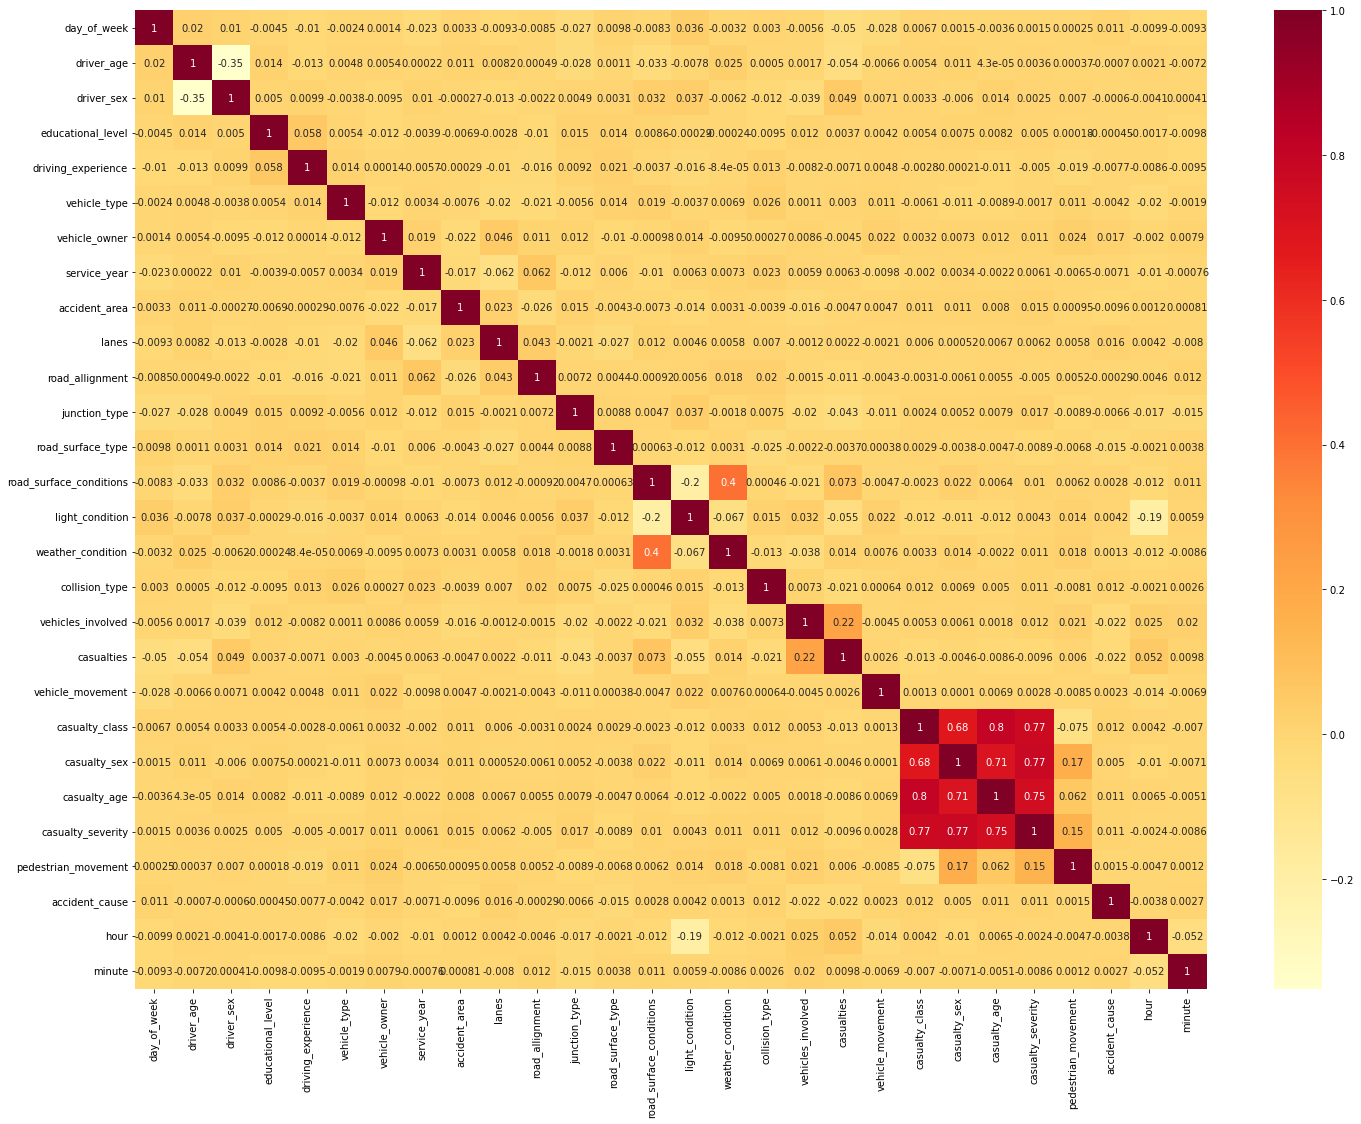

In [94]:
plt.figure(figsize=(24,18))
sns.heatmap(x.corr(),annot=True,cmap="YlOrRd")

## Feature Importance

In [7]:

selection=ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [8]:
print(selection.feature_importances_)

[0.06417512 0.04045563 0.01093482 0.03385014 0.04249813 0.04339011
 0.0153254  0.03555528 0.04309695 0.04051795 0.02536284 0.04439253
 0.01429785 0.024948   0.02852909 0.02518093 0.02918367 0.04847729
 0.05223118 0.04064774 0.01986717 0.01836836 0.02426847 0.01550038
 0.01642729 0.04699189 0.07605946 0.07946634]


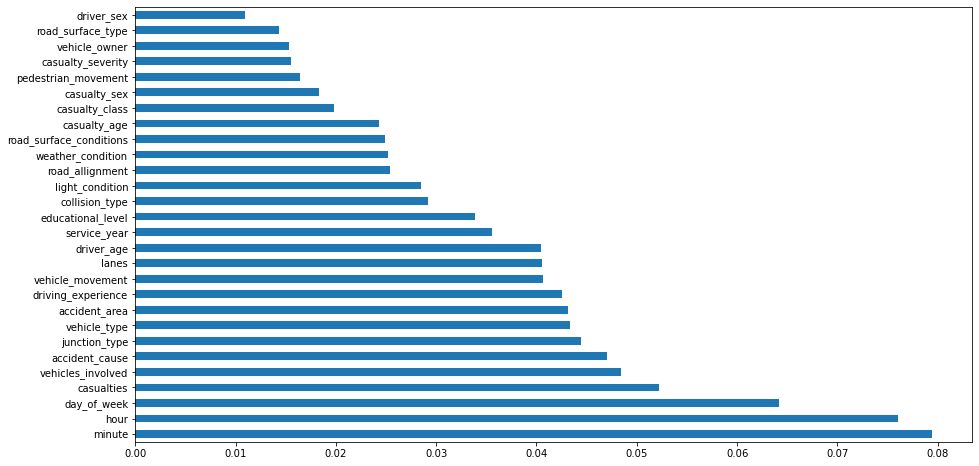

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(40).plot(kind="barh")
plt.show()

## Upsampling

In [15]:
!pip install imblearn

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [34]:
#applying SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [35]:

print("before smote :",Counter(y_train))
print("after smote :",Counter(y_train_smote))

before smote : Counter({2: 7324, 1: 1191, 0: 106})
after smote : Counter({2: 7324, 1: 7324, 0: 7324})


In [36]:
print(x_train_smote.shape,x_test.shape,y_train_smote.shape,y_test.shape)

(21972, 28) (3695, 28) (21972,) (3695,)


## Modelling

In [16]:
scores = {}

In [17]:
# Initialize ExtraTreesClassifier with the given hyperparameters
etc = ExtraTreesClassifier(n_estimators=50, max_depth=5)

# Fit the model to the training data
etc.fit(x_train_smote, y_train_smote)

# Predict the target variable for the test data
y_pred_etc = etc.predict(x_test)
scores['etc']= [accuracy_score(y_test, y_pred_etc)]
scores

{'etc': [0.5926928281461434]}

In [18]:
# Initialize RandomForestClassifier with the given hyperparameters
rfc = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rfc.fit(x_train_smote, y_train_smote)

# Predict the target variable for the test data
y_pred_rfc = rfc.predict(x_test)
scores['rfc']= [accuracy_score(y_test, y_pred_rfc)]
scores

{'etc': [0.5926928281461434], 'rfc': [0.8005412719891746]}

In [19]:
dtc = DecisionTreeClassifier()

# Fit the model to the training data
dtc.fit(x_train_smote, y_train_smote)

# Predict the target variable for the test data
y_pred_dtc = dtc.predict(x_test)

scores['dtc']= [accuracy_score(y_test, y_pred_dtc)]
scores

{'etc': [0.5926928281461434],
 'rfc': [0.8005412719891746],
 'dtc': [0.6912043301759134]}

In [20]:

# Define hyperparameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'reg_lambda': 1
}

# Create an XGBClassifier object
xgb_model = XGBClassifier(**params)

# Fit the model to the training data
xgb_model.fit(x_train_smote, y_train_smote)

# Predict the target variable for the test data
y_pred_xgb = xgb_model.predict(x_test)

scores['xgb']= [accuracy_score(y_test, y_pred_xgb)]
scores

{'etc': [0.5926928281461434],
 'rfc': [0.8005412719891746],
 'dtc': [0.6912043301759134],
 'xgb': [0.7531799729364005]}

In [21]:


# Define the base models
base_models = [('rfc', rfc), ('dtc', dtc), ('xgb', xgb_model)]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacked model
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the stacked model to the training data
stacked_model.fit(x_train_smote, y_train_smote)

# Make predictions on the test data
y_pred = stacked_model.predict(x_test)

# Evaluate the performance of the stacked model
acc = accuracy_score(y_test, y_pred)
print("Accuracy of stacked model: {:.2f}%".format(acc*100))

Accuracy of stacked model: 80.22%


/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print('f1_score:',f1_score(y_test,y_pred,average='weighted'))

f1_score: 0.7756751399884463


## Tuning the stacked model

In [37]:
# Define the base models
rfc = RandomForestClassifier()
dtc = ExtraTreesClassifier()
xgb_model = XGBClassifier()

# Define the stacking classifier
base_models = [('rfc', rfc), ('dtc', dtc), ('xgb', xgb_model)]
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Define the hyperparameter grid
param_grid = {
    'rfc__n_estimators': [50, 100, 200],
    'rfc__max_depth': [5, 10, 15],
    'rfc__min_samples_split': [2, 5, 10],
    'rfc__min_samples_leaf': [1, 2, 4],
    'rfc__max_features': ['sqrt', 'log2'],

    'dtc__max_depth': [5, 10, 15],
    'dtc__min_samples_split': [2, 5, 10],
    'dtc__min_samples_leaf': [1, 2, 4],
    'dtc__max_features': ['sqrt', 'log2'],

    'xgb__max_depth': [5, 10, 15],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 1],
    'xgb__subsample': [0.5, 0.7, 1],
    'xgb__colsample_bytree': [0.5, 0.7, 1],
}

# Define the randomized search object
random_search = RandomizedSearchCV(
    stacking_clf, 
    param_distributions=param_grid, 
    n_iter=50, 
    cv=StratifiedKFold(n_splits=5), 
    random_state=42, 
    n_jobs=-1)

# Fit the randomized search object to the data
random_search.fit(x_train_smote, y_train_smote)

# Print the best parameters and best score
print("Best parameters: ", random_search.best_params_)

Best parameters:  {'xgb__subsample': 0.5, 'xgb__n_estimators': 100, 'xgb__max_depth': 15, 'xgb__learning_rate': 1, 'xgb__colsample_bytree': 0.7, 'rfc__n_estimators': 100, 'rfc__min_samples_split': 2, 'rfc__min_samples_leaf': 2, 'rfc__max_features': 'log2', 'rfc__max_depth': 5, 'dtc__min_samples_split': 5, 'dtc__min_samples_leaf': 1, 'dtc__max_features': 'sqrt', 'dtc__max_depth': 15}


/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Deepthi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [38]:
random_search.best_score_

0.9449796210884323

In [39]:
# Save the model to a file
with open('stacking_clf.pkl', 'wb') as file:
    pickle.dump(random_search.best_estimator_, file)

## testing with stacked model

In [40]:
# Load the saved model from the file
with open('stacking_clf.pkl', 'rb') as file:
    stacking_clf = pickle.load(file)

# Make predictions on the test set
y_pred = stacking_clf.predict(x_test)

# Evaluate the performance of the model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.04      0.07        52
           1       0.32      0.13      0.19       552
           2       0.85      0.95      0.90      3091

    accuracy                           0.82      3695
   macro avg       0.52      0.37      0.38      3695
weighted avg       0.76      0.82      0.78      3695

